# Elite runners stadistics:
- how age affects them
- 

In [36]:
# !pip install pandas
# !pip install scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# read the dataset
df_marathon = pd.read_csv('../Data/marathon_results_2015.csv')

In [26]:
# Time data stored as string "0:14:43"
print(type(df_marathon['5K'][0]))

# List of columns to replace "-" with "24:00:00"
columns_to_replace = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time']

# Replace "-" with "24:00:00" in the specified columns
df_marathon[columns_to_replace] = df_marathon[columns_to_replace].replace('-', '24:00:00')

# Convert the specified columns to a timedelta type
df_marathon[columns_to_replace] = df_marathon[columns_to_replace].apply(pd.to_timedelta)

# Sort the dataframe by the '5K' column in descending order
df_marathon_sorted = df_marathon.sort_values(by='5K', ascending=True)

# Print the top 10 rows
# print(df_marathon_sorted["5K"].head(10))


<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [ ]:
# Filter the dataframe to include only runners with 5K time less than 16 minutes
time_minuts_ranges = [18,25,500]

df_elite_runners = df_marathon_sorted[df_marathon_sorted['5K'] < pd.Timedelta(minutes=time_minuts_ranges[0])]
df_hobby_runners = df_marathon_sorted[(df_marathon_sorted['5K'] >= pd.Timedelta(minutes=time_minuts_ranges[0])) & 
                                      (df_marathon_sorted['5K'] < pd.Timedelta(minutes=time_minuts_ranges[1]))]
df_new_runners = df_marathon_sorted[(df_marathon_sorted['5K'] >= pd.Timedelta(minutes=time_minuts_ranges[1])) & 
                                    (df_marathon_sorted['5K'] < pd.Timedelta(days=1))]

In [22]:
# Assuming df_elite_runners is your DataFrame with elite runners' times in a column named '5K'
elite_times = df_elite_runners['5K'].dt.total_seconds()  # Convert to seconds for easier calculation

# Calculate mean and standard deviation
mean_time = elite_times.mean()
std_dev_time = elite_times.std()

# Generate a normal distribution with the calculated mean and standard deviation
normal_distribution = np.random.normal(loc=mean_time, scale=std_dev_time, size=1000)

# Convert the generated times back to timedelta if needed
normal_distribution_timedelta = pd.to_timedelta(normal_distribution, unit='s')

print(normal_distribution_timedelta)
print(f"Mean time: {mean_time} seconds")
print(f"Standard deviation: {std_dev_time} seconds")

# Assuming df_elite_runners, df_hobby_runners, and df_new_runners are your DataFrames
elite_times = df_elite_runners['Official Time'].dt.total_seconds()
hobby_times = df_hobby_runners['Official Time'].dt.total_seconds()
new_times = df_new_runners['Official Time'].dt.total_seconds()

# Calculate mean and standard deviation for each group
mean_times = [elite_times.mean(), hobby_times.mean(), new_times.mean()]
std_dev_times = [elite_times.std(), hobby_times.std(), new_times.std()]

TimedeltaIndex(['0 days 00:18:31.947888082', '0 days 00:17:34.353822345',
                '0 days 00:17:29.029926526', '0 days 00:17:02.771814304',
                '0 days 00:17:15.230970295', '0 days 00:17:27.730432887',
                '0 days 00:16:27.604455299', '0 days 00:16:46.728795956',
                '0 days 00:17:04.816849866', '0 days 00:16:33.276248374',
                ...
                '0 days 00:17:26.435450031', '0 days 00:16:36.991217582',
                '0 days 00:16:27.035023711', '0 days 00:18:32.876351088',
                '0 days 00:16:51.501400980', '0 days 00:18:14.819360545',
                '0 days 00:18:22.693067646', '0 days 00:17:12.550666609',
                '0 days 00:17:47.990210707', '0 days 00:16:38.170274737'],
               dtype='timedelta64[ns]', length=1000, freq=None)
Mean time: 1025.3881278538813 seconds
Standard deviation: 52.19696329933047 seconds


C:\Users\carle\AppData\Local\Temp\ipykernel_17444\3558036437.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(data, labels=['Elite Runners', 'Hobby Runners', 'New Runners'])


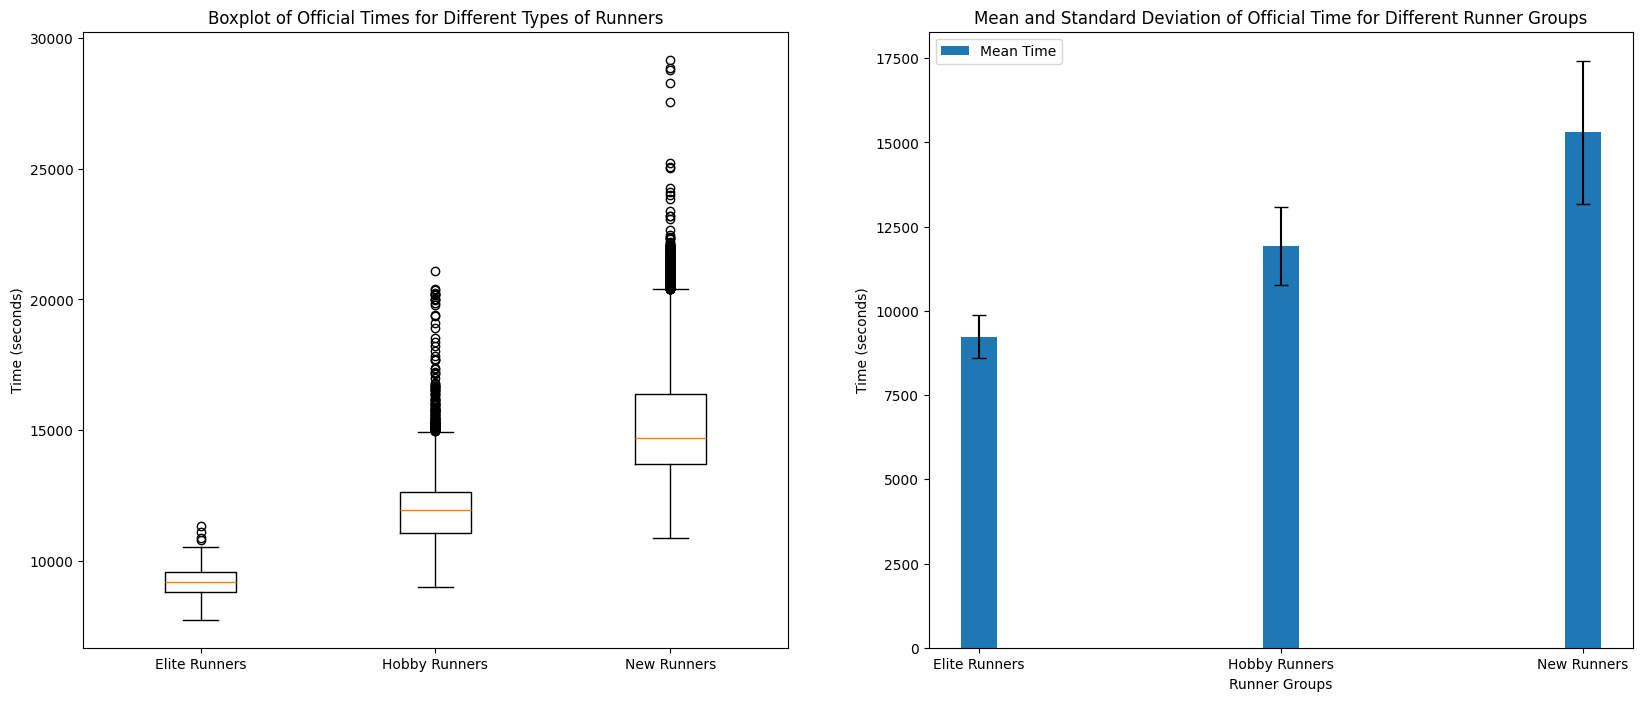

In [33]:
# Define labels for the groups
labels = ['Elite Runners', 'Hobby Runners', 'New Runners']

# Create a bar plot with error bars
x = np.arange(len(labels))
width = 0.12

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Boxplot of Official Times for Different Types of Runners
data = [df_elite_runners['Official Time'].dt.total_seconds(), 
    df_hobby_runners['Official Time'].dt.total_seconds(), 
    df_new_runners['Official Time'].dt.total_seconds()]
ax1.boxplot(data, labels=['Elite Runners', 'Hobby Runners', 'New Runners'])
ax1.set_title('Boxplot of Official Times for Different Types of Runners')
ax1.set_ylabel('Time (seconds)')

# Bar plot with error bars
bars = ax2.bar(x, mean_times, width, yerr=std_dev_times, capsize=5, label='Mean Time')
ax2.set_xlabel('Runner Groups')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Mean and Standard Deviation of Official Time for Different Runner Groups')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

# Show the combined plot
plt.show()


C:\Users\carle\AppData\Local\Temp\ipykernel_17444\3447813873.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['Elite Runners', 'Hobby Runners', 'New Runners'])


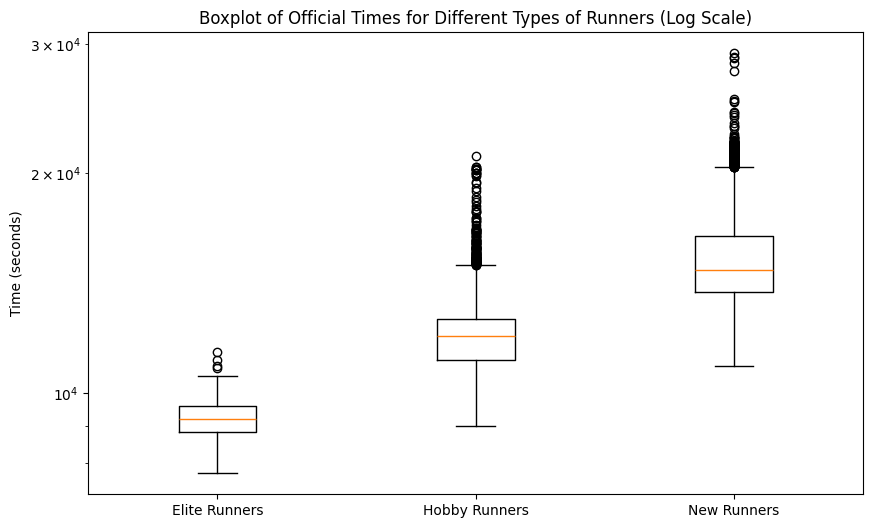

In [34]:
# Create a new figure and axis for the boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot of Official Times for Different Types of Runners with log scale
data = [df_elite_runners['Official Time'].dt.total_seconds(), 
    df_hobby_runners['Official Time'].dt.total_seconds(), 
    df_new_runners['Official Time'].dt.total_seconds()]
ax.boxplot(data, labels=['Elite Runners', 'Hobby Runners', 'New Runners'])
ax.set_title('Boxplot of Official Times for Different Types of Runners (Log Scale)')
ax.set_ylabel('Time (seconds)')
ax.set_yscale('log')

# Show the plot
plt.show()

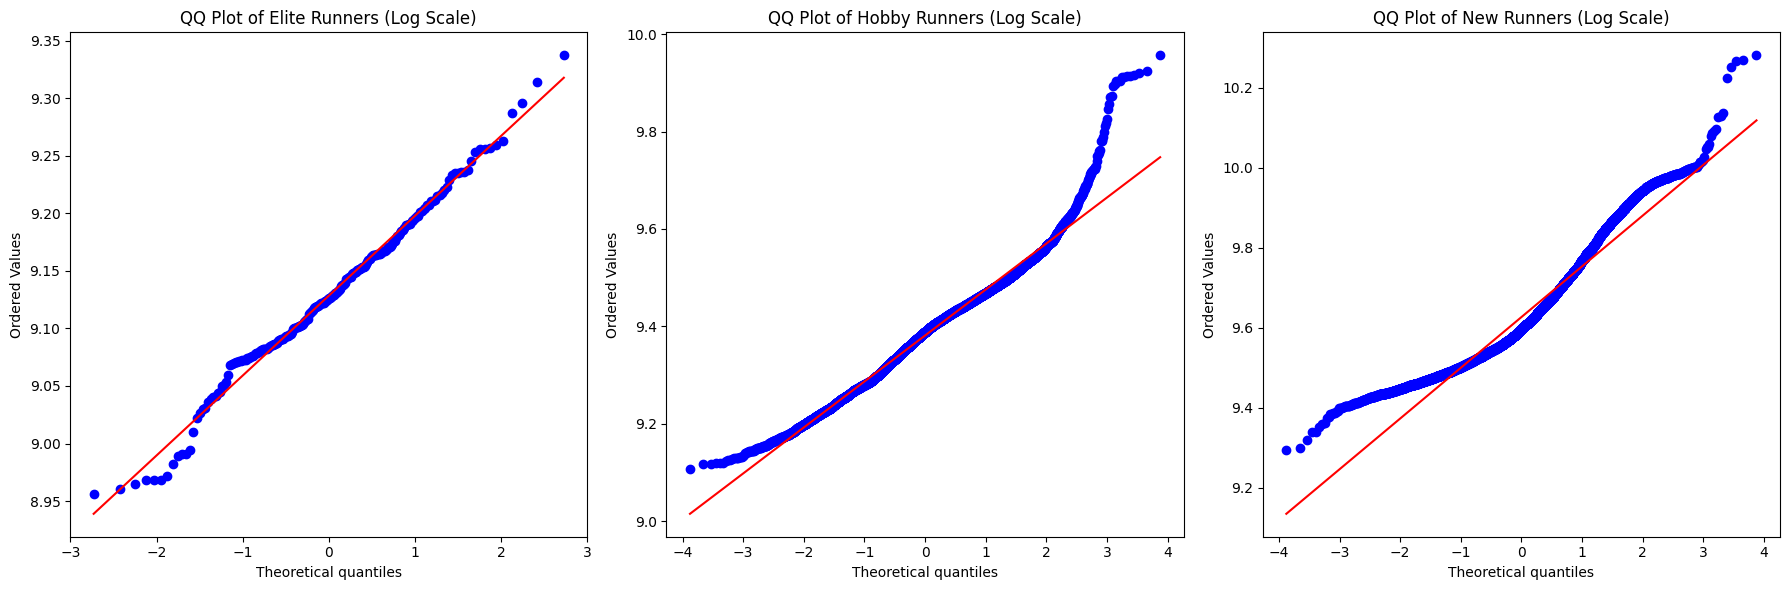

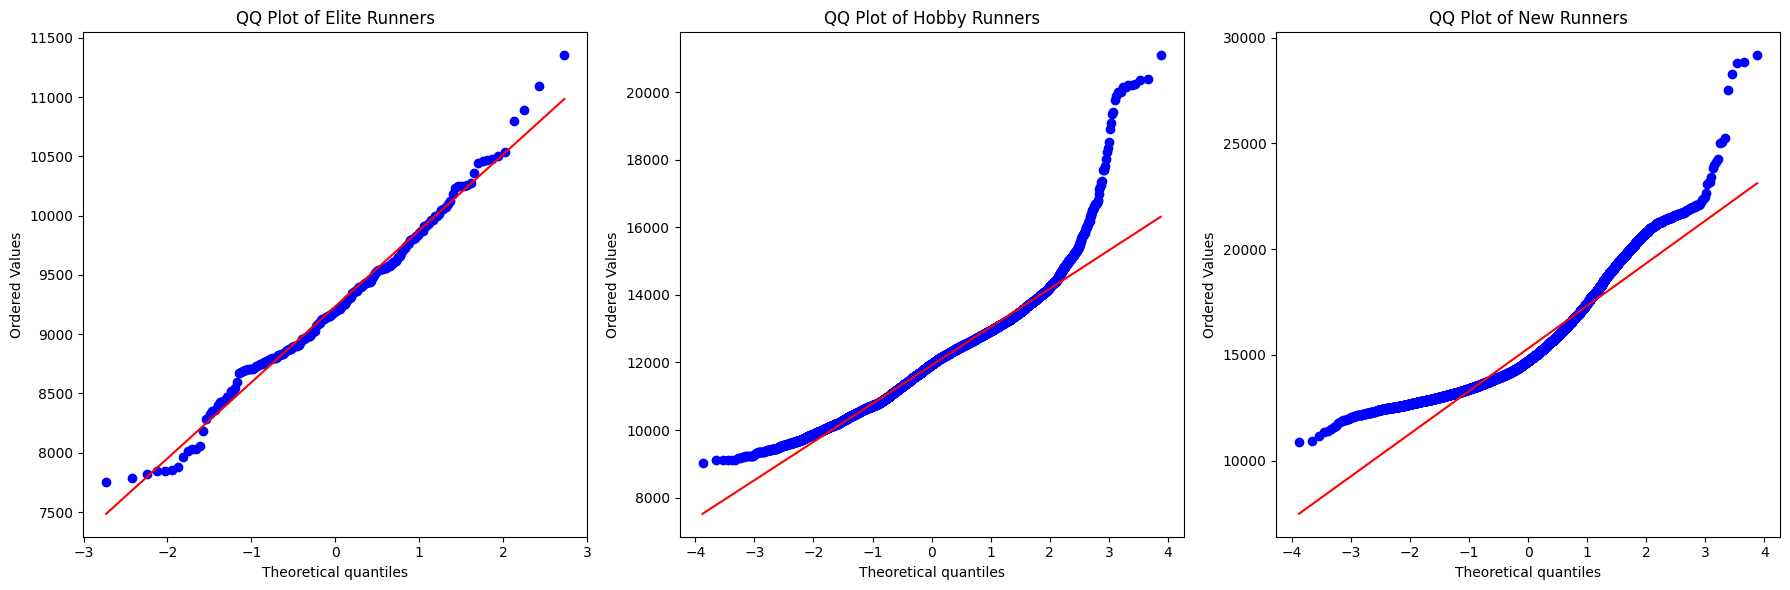

In [39]:
# Create a new figure and axis for the QQ plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# QQ plot for Elite Runners
stats.probplot(np.log(elite_times), dist="norm", plot=axes[0])
axes[0].set_title('QQ Plot of Elite Runners (Log Scale)')

# QQ plot for Hobby Runners
stats.probplot(np.log(hobby_times), dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot of Hobby Runners (Log Scale)')

# QQ plot for New Runners
stats.probplot(np.log(new_times), dist="norm", plot=axes[2])
axes[2].set_title('QQ Plot of New Runners (Log Scale)')

# Show the plots
plt.tight_layout()
plt.show()

# Create a new figure and axis for the QQ plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# QQ plot for Elite Runners
stats.probplot(elite_times, dist="norm", plot=axes[0])
axes[0].set_title('QQ Plot of Elite Runners')

# QQ plot for Hobby Runners
stats.probplot(hobby_times, dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot of Hobby Runners')

# QQ plot for New Runners
stats.probplot(new_times, dist="norm", plot=axes[2])
axes[2].set_title('QQ Plot of New Runners')

# Show the plots
plt.tight_layout()
plt.show()

In [59]:
# Execute a shapiro test to check if the data np.log(elite_times) np.log(hobby_times) np.log(new_times)is normally distributed

# Perform Shapiro-Wilk test for normality
shapiro_elite = stats.shapiro(np.log(elite_times))
shapiro_hobby = stats.shapiro(np.log(hobby_times))
shapiro_new = stats.shapiro(np.log(new_times))
# Shapiro null hypothesis: the data is normally distributed
# elite is normally distributed but hobby and new are not normally distributed

print("Shapiro-Wilk Test for Elite Runners (Log Scale):", shapiro_elite)
print("Shapiro-Wilk Test for Hobby Runners (Log Scale):", shapiro_hobby)
print("Shapiro-Wilk Test for New Runners (Log Scale):", shapiro_new)


Shapiro-Wilk Test for Elite Runners (Log Scale): ShapiroResult(statistic=np.float64(0.989536416567343), pvalue=np.float64(0.1126852846515769))
Shapiro-Wilk Test for Hobby Runners (Log Scale): ShapiroResult(statistic=np.float64(0.9850075973802419), pvalue=np.float64(8.483017070941891e-35))
Shapiro-Wilk Test for New Runners (Log Scale): ShapiroResult(statistic=np.float64(0.9396116095113584), pvalue=np.float64(5.124681769350607e-58))


c:\Users\carle\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13093.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\carle\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13134.
  res = hypotest_fun_out(*samples, **kwds)


In [58]:
# Calculate the percentage of males and females in each group
def calculate_gender_percentage(df):
    gender_counts = df['M/F'].value_counts(normalize=True) * 100
    return gender_counts

elite_gender_percentage = calculate_gender_percentage(df_elite_runners)
hobby_gender_percentage = calculate_gender_percentage(df_hobby_runners)
new_gender_percentage = calculate_gender_percentage(df_new_runners)

print("Elite Runners Gender Percentage:")
print(elite_gender_percentage)
print("\nHobby Runners Gender Percentage:")
print(hobby_gender_percentage)
print("\nNew Runners Gender Percentage:")
print(new_gender_percentage)

# Calculate the percentage of runners in each group
total_runners = len(df_marathon_sorted)
elite_percentage = (len(df_elite_runners) / total_runners) * 100
hobby_percentage = (len(df_hobby_runners) / total_runners) * 100
new_percentage = (len(df_new_runners) / total_runners) * 100

print(f"Percentage of Elite Runners: {elite_percentage:.2f}%")
print(f"Percentage of Hobby Runners: {hobby_percentage:.2f}%")
print(f"Percentage of New Runners: {new_percentage:.2f}%")

Elite Runners Gender Percentage:
M/F
M    93.607306
F     6.392694
Name: proportion, dtype: float64

Hobby Runners Gender Percentage:
M/F
M    70.304743
F    29.695257
Name: proportion, dtype: float64

New Runners Gender Percentage:
M/F
F    61.26085
M    38.73915
Name: proportion, dtype: float64
Percentage of Elite Runners: 0.82%
Percentage of Hobby Runners: 49.23%
Percentage of New Runners: 49.38%


# CLIMATE

In [50]:
# Read the CSV files into dataframes
df_max_temps = pd.read_csv('../Data/barcelona_max_temp.csv', sep=';')
df_min_temps = pd.read_csv('../Data/barcelona_min_temp.csv', sep=';')
df_precip    = pd.read_csv('../Data/barcelona_precip.csv', sep=';')

# Calculate the mean of each column
mean_max_temps = df_max_temps.mean()
mean_min_temps = df_min_temps.mean()
mean_df_precip = df_precip.mean()
# print(mean_max_temps, mean_min_temps, mean_df_precip)

In [56]:
VVm=[4.9, 4.6, 4.4, 3.9, 4.0, 3.6, 3.6, 3.5, 3.5, 3.7, 4.6, 5.1, 4.1]
VVx=[29.0,23.9,25.2,21.9,24.0,17.7,31.7,22.0,20.7,28.0,25.7,27.6,31.7]
VV_mean=[(VVm[i] + VVx[i])/2 for i in range(len(VVm))]

In [60]:
# Create the first dataframe with month, max temp, min temp, and wind
data1 = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Avg'],
    'Max Temp (°C)': [11.107143, 12.220000, 14.645714, 16.894286, 20.528571, 24.604286, 27.842857, 27.705714, 24.424286, 19.990000, 14.738571, 11.745714, 18.000000],
    'Min Temp (°C)': [5.282857, 5.458571, 7.302857, 8.954286, 12.321429, 16.115714, 18.997143, 19.082857, 16.672857, 13.234286, 8.830000, 6.215714, 11.000000],
    'Wind (km/h)': [16.95, 14.25, 14.80, 12.90, 14.00, 10.65, 17.65, 12.75, 12.10, 15.85, 15.15, 16.35, 14.00]
}
df1 = pd.DataFrame(data1)

# Create the second dataframe with month, precipitation, and humidity
data2 = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Avg'],
    'Precipitation (mm)': [42.744286, 36.530000, 51.457143, 54.905714, 58.244286, 37.251429, 28.750000, 43.684286, 73.140000, 88.288571, 62.912857, 47.317143, 55.000000],
    'Humidity (%)': [68, 65, 64, 67, 65, 60, 63, 65, 68, 72, 69, 67, 66]
}
df2 = pd.DataFrame(data2)

# Display the dataframes
print(df1)
print(df2)


   Month  Max Temp (°C)  Min Temp (°C)  Wind (km/h)
0    Jan      11.107143       5.282857        16.95
1    Feb      12.220000       5.458571        14.25
2    Mar      14.645714       7.302857        14.80
3    Apr      16.894286       8.954286        12.90
4    May      20.528571      12.321429        14.00
5    Jun      24.604286      16.115714        10.65
6    Jul      27.842857      18.997143        17.65
7    Aug      27.705714      19.082857        12.75
8    Sep      24.424286      16.672857        12.10
9    Oct      19.990000      13.234286        15.85
10   Nov      14.738571       8.830000        15.15
11   Dec      11.745714       6.215714        16.35
12   Avg      18.000000      11.000000        14.00
   Month  Precipitation (mm)  Humidity (%)
0    Jan           42.744286            68
1    Feb           36.530000            65
2    Mar           51.457143            64
3    Apr           54.905714            67
4    May           58.244286            65
5    Jun      

# Enviorment effect on runners